In [8]:
import codecs
import glob
import math
import os
from decimal import Decimal
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm



plt.rcParams["font.family"] = "Times New Roman"

In [3]:
data_dir = "data/input/励起状態/beta/NH/*.out"
paths = [p for p in glob.glob(data_dir)]

In [4]:
# とりあえずfを取り出して見る。
# key
excited_state_1 = "Excited State   1"
excited_state_2 = "Excited State   2"
excited_state_3 = "Excited State   3"

initial_key = "Excited State   1"
end_key = "SavETr"
result_dir = "data/output/result.csv"
df_output = pd.DataFrame()

for path in paths:
    # file_nameから角度の情報を取る
    file_name = path.split('/')[-1]
    torsion_angle = int(file_name.split("@")[0].split("_")[-1])

    with codecs.open(path, "r", "UTF-8", "ignore") as file:
        df = pd.read_table(file)
        df = df.rename(columns={df.columns[0]: 'Col_1'})
        # initial_keyを含む行を探す
        initial_key_df = df[df['Col_1'].str.contains(initial_key, case=False)]
        initial_key_index = initial_key_df.index[0]
        df = df.iloc[initial_key_index:]
        # initial_keyを含む行以降のend_keyを含む行を抜き出す
        end_key_df = df[df['Col_1'].str.contains(end_key)]
        # dfを更新しているのでここでの行番号は0から始まる
        end_key_index = end_key_df.index[0] - initial_key_index
        df = df.iloc[:end_key_index]
        # 該当行の抜き出しが完了
        
        S1_data = [a for a in df[df['Col_1'].str.contains(excited_state_1)]['Col_1'].iloc[0].split(' ') if a != '']
        f_1 = float(S1_data[-2].split('f=')[-1])
        E_1 = float(S1_data[4])
        
        
        S2_data = [a for a in df[df['Col_1'].str.contains(excited_state_2)]['Col_1'].iloc[0].split(' ') if a != '']
        f_2 = float(S2_data[-2].split('f=')[-1])
        E_2 = float(S2_data[4])
        
        S3_data = [a for a in df[df['Col_1'].str.contains(excited_state_3)]['Col_1'].iloc[0].split(' ') if a != '']
        f_3 = float(S3_data[-2].split('f=')[-1])
        E_3 = float(S3_data[4])
        
        S1_data_index = df[df['Col_1'].str.contains(excited_state_1)].index[0]
        S2_data_index = df[df['Col_1'].str.contains(excited_state_2)].index[0]
        S3_data_index = df[df['Col_1'].str.contains(excited_state_3)].index[0]

#         軌道とその寄与のデータ
        # 1
        S1_orbit = []
        S1_contri = []
        for n in range(S2_data_index - S1_data_index): 
            if df.loc[n + S1_data_index].str.contains("->").iloc[0]:
                S1_orbit.append(("").join(df.loc[n + S1_data_index][0].split(" ")[6:9]))
                S1_contri.append(df.loc[n + S1_data_index][0].split(" ")[-1])

        # 2
        S2_orbit = []
        S2_contri = []
        for n in range(S3_data_index - S2_data_index): 
            if df.loc[n + S2_data_index].str.contains("->").iloc[0]:
                S2_orbit.append(("").join(df.loc[n + S2_data_index][0].split(" ")[6:9]))
                S2_contri.append(df.loc[n + S2_data_index][0].split(" ")[-1])

        # 3 
        S3_orbit = []
        S3_contri = []
        for n in range(S1_data_index + len(df) - S3_data_index): 
            if df.loc[n + S3_data_index].str.contains("->").iloc[0]:
                S3_orbit.append(("").join(df.loc[n + S3_data_index][0].split(" ")[6:9]))
                S3_contri.append(df.loc[n + S3_data_index][0].split(" ")[-1])

        
        df_result = pd.DataFrame(data=[f_1, E_1, f_2, E_2, f_3, E_3], 
                            columns=[torsion_angle],
                            index=["f_1", "E_1", "f_2", "E_2", "f_3", "E_3"]).T
#         df_f = pd.DataFrame(data=[f_1, f_2, f_3], 
#                             columns=[torsion_angle],
#                             index=["f_1", "f_2", "f_3"]).T
#         df_E = pd.DataFrame(data=[E_1, E_2, E_3], 
#                             columns=[torsion_angle],
#                             index=["E_1", "E_2", "E_3"]).T

#         df_transition = pd.DataFrame(data=[f_1, E_1, f_2, E_2, f_3, E_3], 
#                             columns=[torsion_angle],
#                             index=["f_1", "E_1", "f_2", "E_2", "f_3", "E_3"]).T

        df_output = pd.concat([df_output, df_result]).sort_index()

In [12]:
# df_output

## S1, S2のエネルギープロット

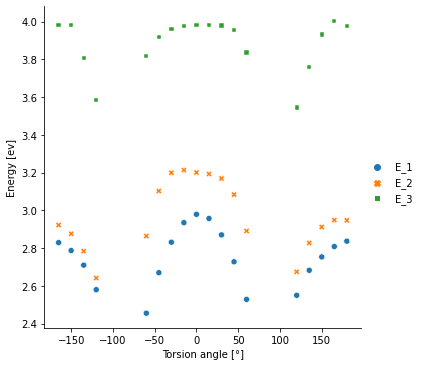

In [11]:
df_E = df_output.drop(columns=["f_1", "f_2", "f_3"])

g = sns.relplot(data=df_E, markers=True)
g.ax.set_xlabel('Torsion angle [°]')
g.ax.set_ylabel('Energy [ev]')
plt.show()

In [98]:
df_E.columns

Index(['E_1', 'E_2', 'E_3'], dtype='object')

In [92]:
df.rename(index={df.index: 'Col_1'})

TypeError: 'list' object is not callable

In [24]:
E_1 = float(S1_data[4])

In [42]:
df.loc[S1_data_index:2380]

,Col_1
2377,Excited State 1: Singlet-A 2.5277...
2378,51 -> 53 0.36302
2379,52 -> 53 0.60462
2380,This state for optimization and/or second-ord...


In [71]:

# 1
S1_orbit = []
S1_contri = []
for n in range(S2_data_index - S1_data_index): 
    if df.loc[n + S1_data_index].str.contains("->").iloc[0]:
        S1_orbit.append(("").join(df.loc[n + S1_data_index][0].split(" ")[6:9]))
        S1_contri.append(df.loc[n + S1_data_index][0].split(" ")[-1])
        
# 2
S2_orbit = []
S2_contri = []
for n in range(S3_data_index - S2_data_index): 
    if df.loc[n + S2_data_index].str.contains("->").iloc[0]:
        S2_orbit.append(("").join(df.loc[n + S2_data_index][0].split(" ")[6:9]))
        S2_contri.append(df.loc[n + S2_data_index][0].split(" ")[-1])
    
# 3 
S3_orbit = []
S3_contri = []
for n in range(S1_data_index + len(df) - S3_data_index): 
    if df.loc[n + S3_data_index].str.contains("->").iloc[0]:
        S3_orbit.append(("").join(df.loc[n + S3_data_index][0].split(" ")[6:9]))
        S3_contri.append(df.loc[n + S3_data_index][0].split(" ")[-1])

In [77]:
S2_orbit

['51->53', '52->53']

In [76]:
S2_contri

['0.59845', '-0.36337']

In [40]:
orbit_n

'52->53'

2383

In [79]:
excited_state_2

'Excited State   2'

In [64]:
print(range(280-275))

range(0, 5)


In [56]:
S3_data_index 


2386

In [63]:
S2_data_index - S1_data_index

6

In [54]:
df

,Col_1
2377,Excited State 1: Singlet-A 2.5277...
2378,51 -> 53 0.36302
2379,52 -> 53 0.60462
2380,This state for optimization and/or second-ord...
2381,"Total Energy, E(TD-HF/TD-DFT) = -632.0095455..."
2382,Copying the excited state density for this st...
2383,Excited State 2: Singlet-A 2.8906...
2384,51 -> 53 0.59845
2385,52 -> 53 -0.36337
2386,Excited State 3: Singlet-A 3.8366...


In [62]:
S1_data_index + len(df) - S3_data_index

2